In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [4]:
df = pd.read_csv("sentimentdataset.csv")

In [5]:
class_counts = df['Sentiment'].value_counts()
selected_classes = class_counts[class_counts > 6].index


df.loc[~df['Sentiment'].isin(selected_classes), 'Sentiment'] = 'Miscellaneous'


class_to_int = {
    " Positive  ": 0,
    " Excitement ": 1,
    " Contentment ": 2,
    " Joy ": 3,
    " Neutral ": 4,
    " Happy ": 5,
    "Miscellaneous": 6,
    " Hopeful ": 7,
    " Gratitude ": 8,
    " Sad ": 9,
    " Loneliness ": 10,
    " Embarrassed ": 11,
    " Curiosity ": 12
}


In [6]:
df['Sentiment'] = df['Sentiment'].replace(class_to_int)


X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.2, random_state=42)


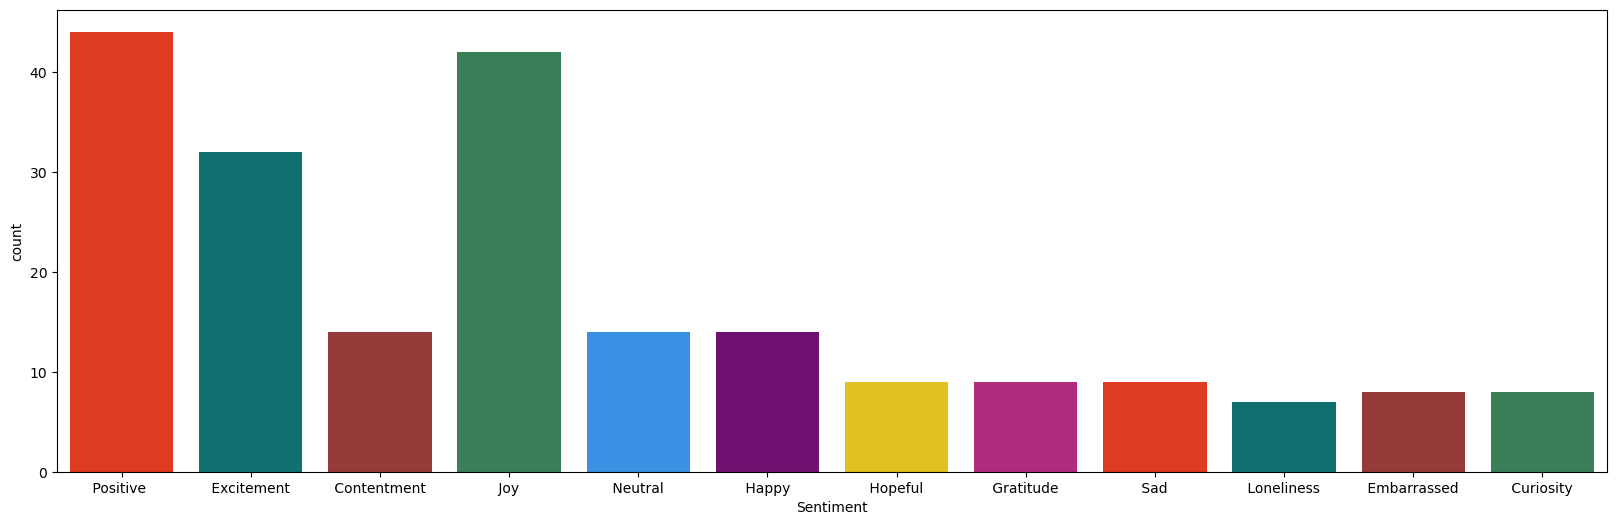

In [7]:
# Data Visualization
plt.figure(figsize=(20, 6))
custom_palette = ['#FF2400', 'teal', '#A52A2A', 'Seagreen', 'Dodgerblue', 'Purple', 'Gold', 'MediumVioletRed']
sns.countplot(x='Sentiment', data=df[df['Sentiment'] != 6], palette=custom_palette)
# Define class names here
class_names = [" Positive  ", " Excitement ", " Contentment ", " Joy ", " Neutral ", " Happy ", " Hopeful ",
               " Gratitude ", " Sad ", " Loneliness ", " Embarrassed ", " Curiosity "]
# Replace x-axis tick labels
plt.gca().set_xticklabels(class_names)
plt.show()

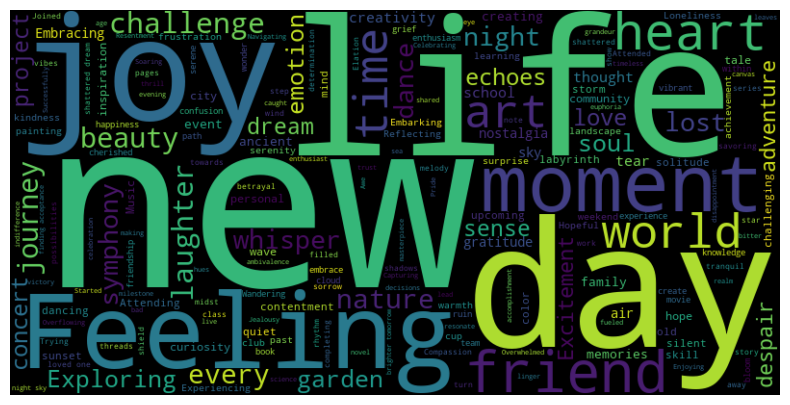

In [8]:
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(df['Text']))

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

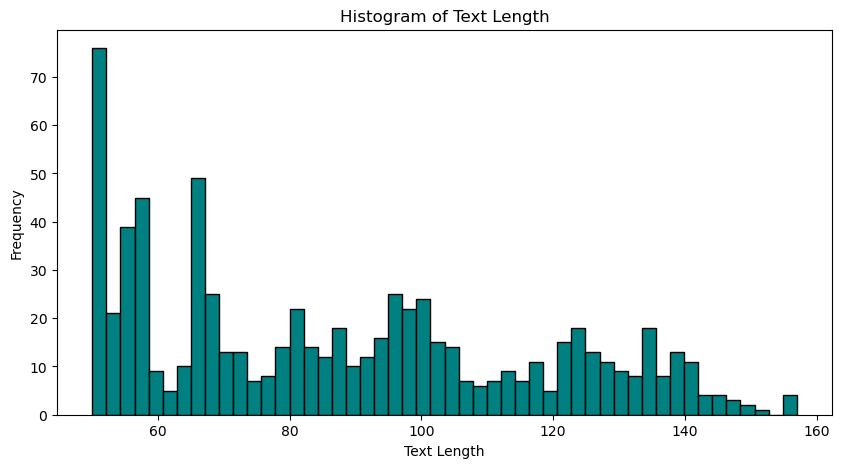

In [9]:
# Plot a histogram of text lengths
plt.figure(figsize=(10, 5))
df['Text'].apply(len).plot(kind='hist', bins=50, color='teal', edgecolor='black')
plt.title('Histogram of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

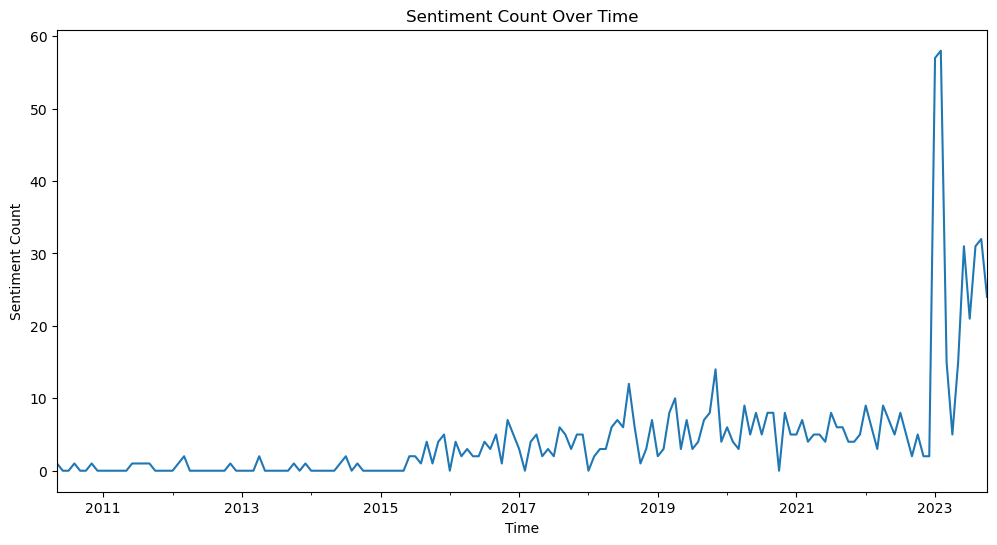

In [10]:
# Convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plot sentiment count over time
plt.figure(figsize=(12, 6))
df.resample('M', on='Timestamp')['Sentiment'].count().plot()
plt.title('Sentiment Count Over Time')
plt.xlabel('Time')
plt.ylabel('Sentiment Count')
plt.show()

In [5]:
models = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging Classifier': BaggingClassifier()
}

In [6]:
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

In [7]:
for model_name, model in models.items():
    # Create a pipeline with TF-IDF vectorizer and the model
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('model', model)
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predictions
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetri

In [8]:
# Create a DataFrame from the results
results_df = pd.DataFrame(results)

In [9]:
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0                  SVM  0.768707   0.600907  0.768707  0.674320
1        Random Forest  0.775510   0.682829  0.775510  0.698429
2    Gradient Boosting  0.741497   0.674803  0.741497  0.704681
3  Logistic Regression  0.761905   0.580499  0.761905  0.658945
4  K-Nearest Neighbors  0.768707   0.719955  0.768707  0.740797
5          Naive Bayes  0.761905   0.580499  0.761905  0.658945
6        Decision Tree  0.768707   0.755306  0.768707  0.752057
7             AdaBoost  0.761905   0.586653  0.761905  0.662679
8          Extra Trees  0.795918   0.700247  0.795918  0.742008
9   Bagging Classifier  0.782313   0.700675  0.782313  0.731350


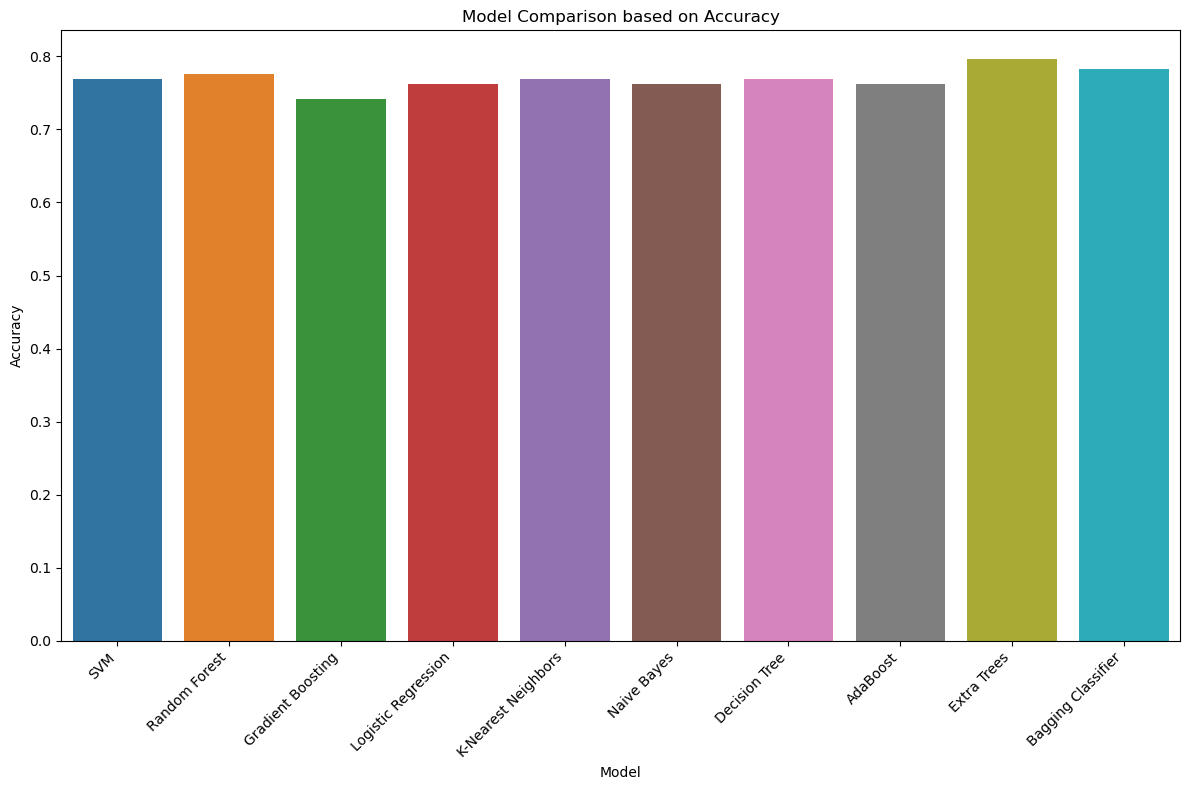

In [10]:
# Plot comparison graph with rotated x-axis labels
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Comparison based on Accuracy')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

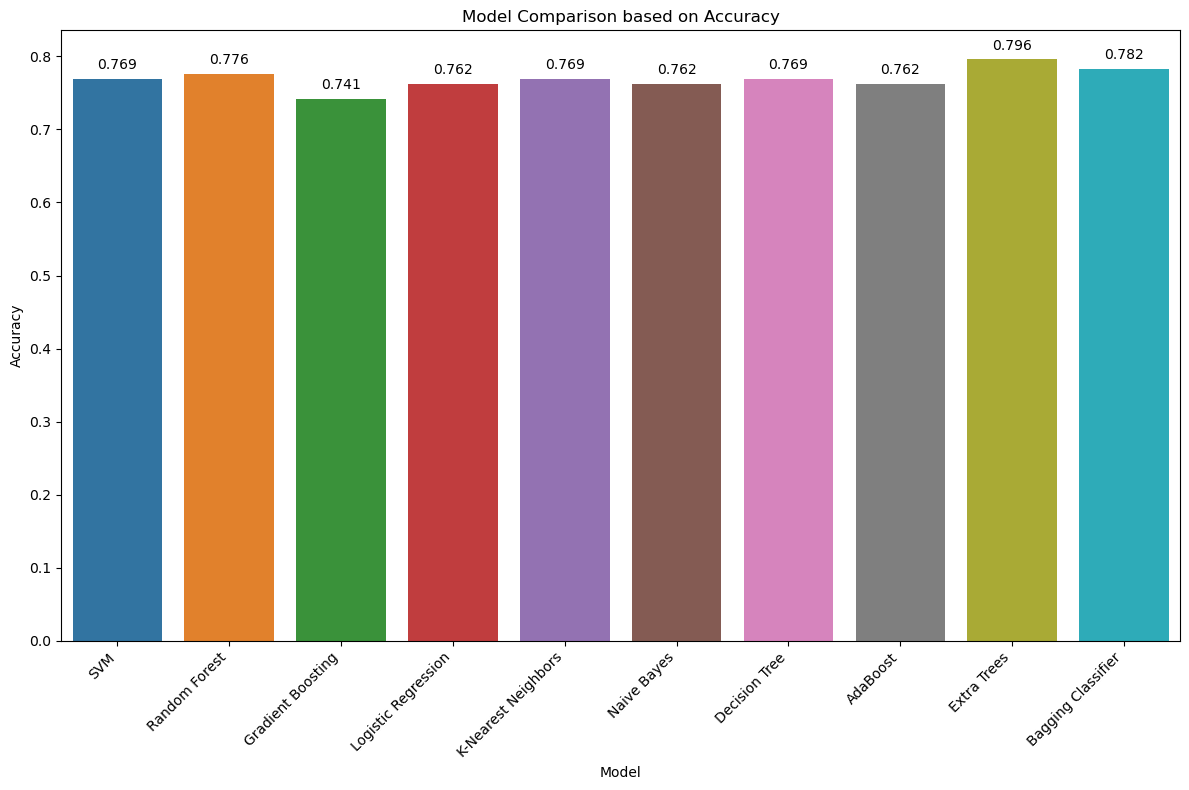

In [11]:
# Plot comparison graph with rotated x-axis labels and accuracy labels on bars
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Comparison based on Accuracy')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Display accuracy values on top of each bar
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                     textcoords='offset points')

plt.tight_layout()
plt.show()


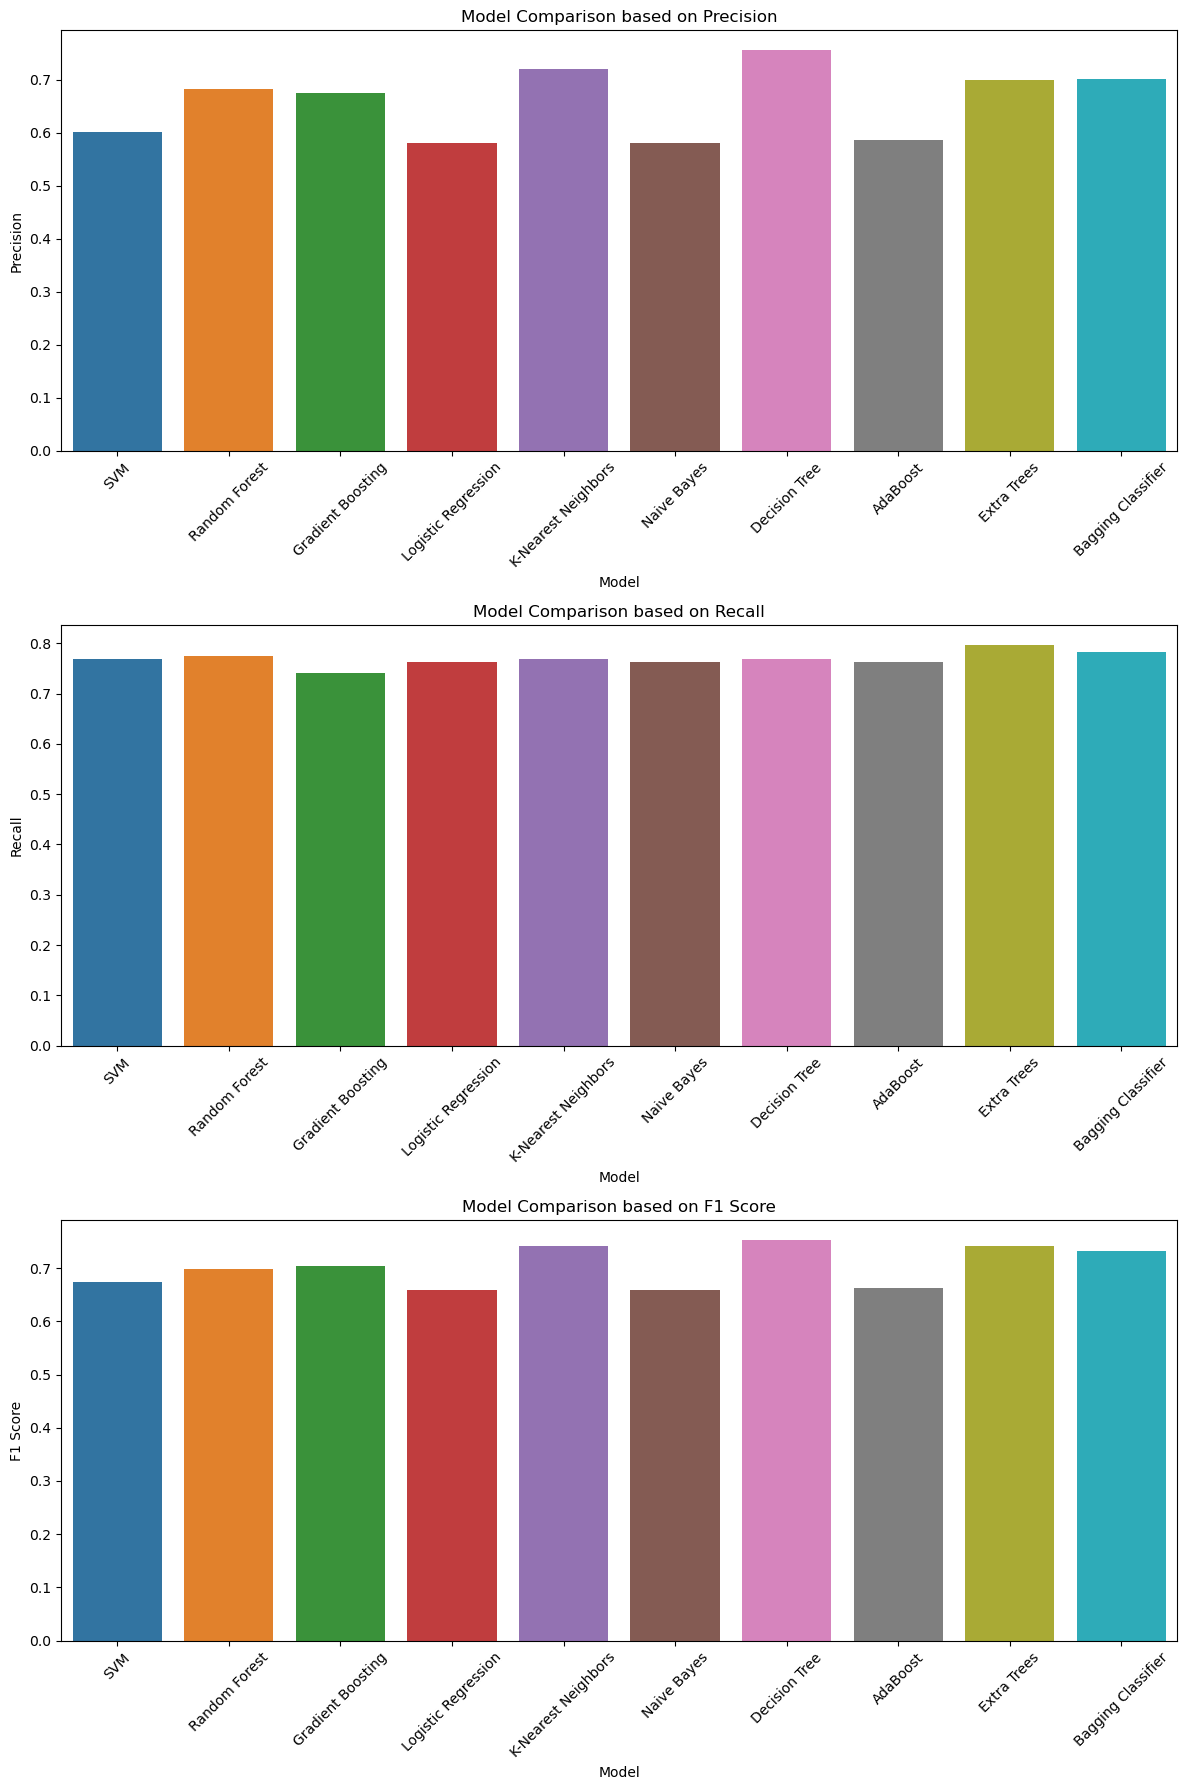

In [17]:
# Plot comparison graphs for Precision, Recall, and F1 Score
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot Precision
sns.barplot(x='Model', y='Precision', data=results_df, ax=axes[0])
axes[0].set_title('Model Comparison based on Precision')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Plot Recall
sns.barplot(x='Model', y='Recall', data=results_df, ax=axes[1])
axes[1].set_title('Model Comparison based on Recall')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Plot F1 Score
sns.barplot(x='Model', y='F1 Score', data=results_df, ax=axes[2])
axes[2].set_title('Model Comparison based on F1 Score')
axes[2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()
